## Parameter Optimization of SVM


### Name:Priyajot Gill
### Roll number: 102003293

In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt

     

In [3]:
df = pd.read_csv("/Users/priya/Downloads/Skin_NonSkin.txt", names=['B', 'G', 'R', 'target'], sep="\t", index_col=False)
df.head()

,B,G,R,target
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


In [4]:
train_accs = []
test_accs = []
svm_best_params = []

for i in range(10):

  print('-------- Sample {}-------\n'.format(i))
  dfi = df.sample(frac=0.1)
  X = dfi.iloc[:, :-1].values
  y = dfi.iloc[:, -1].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  # Optimize the SVM using grid search with cross-validation
  param_grid = {
      'C': [0.1, 1, 10, 100],
      'gamma': [0.1, 0.01, 0.001, 0.0001],
      'kernel': ['linear', 'rbf', 'sigmoid']
  }
  grid_search = GridSearchCV(SVC(), param_grid, cv=3, verbose=100, refit=True)
  grid_search.fit(X_train, y_train)
  best_params = grid_search.best_params_
  svm_best_params.append(best_params)

  print(best_params)
  # Train and test the SVM with the best parameters
  svm = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'], max_iter=1000)
  svm.fit(X_train, y_train)
  train_acc = svm.score(X_train, y_train)
  test_acc = svm.score(X_test, y_test)
  train_accs.append(train_acc)
  test_accs.append(test_acc)

-------- Sample 0-------

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 1/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.931 total time=   2.3s
[CV 2/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 2/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.931 total time=   2.4s
[CV 3/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 3/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.925 total time=   2.2s
[CV 1/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 1/3; 2/48] END C=0.1, gamma=0.1, kernel=rbf;, score=0.975 total time=   2.8s
[CV 2/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 2/3; 2/48] END C=0.1, gamma=0.1, kernel=rbf;, score=0.979 total time=   2.8s
[CV 3/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 3/3; 2/4

/Users/priya/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


-------- Sample 1-------

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 1/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.929 total time=   2.2s
[CV 2/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 2/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.930 total time=   2.1s
[CV 3/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 3/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.930 total time=   2.2s
[CV 1/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 1/3; 2/48] END C=0.1, gamma=0.1, kernel=rbf;, score=0.975 total time=   2.9s
[CV 2/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 2/3; 2/48] END C=0.1, gamma=0.1, kernel=rbf;, score=0.979 total time=   2.9s
[CV 3/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 3/3; 2/4

/Users/priya/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


-------- Sample 2-------

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 1/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.930 total time=   2.1s
[CV 2/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 2/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.931 total time=   2.2s
[CV 3/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 3/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.924 total time=   2.1s
[CV 1/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 1/3; 2/48] END C=0.1, gamma=0.1, kernel=rbf;, score=0.978 total time=   3.0s
[CV 2/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 2/3; 2/48] END C=0.1, gamma=0.1, kernel=rbf;, score=0.977 total time=   3.0s
[CV 3/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 3/3; 2/4

/Users/priya/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


-------- Sample 3-------

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 1/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.926 total time=   2.2s
[CV 2/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 2/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.927 total time=   2.2s
[CV 3/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 3/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.933 total time=   2.2s
[CV 1/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 1/3; 2/48] END C=0.1, gamma=0.1, kernel=rbf;, score=0.978 total time=   2.8s
[CV 2/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 2/3; 2/48] END C=0.1, gamma=0.1, kernel=rbf;, score=0.976 total time=   2.8s
[CV 3/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 3/3; 2/4

/Users/priya/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


-------- Sample 4-------

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 1/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.930 total time=   2.3s
[CV 2/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 2/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.933 total time=   2.2s
[CV 3/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 3/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.930 total time=   2.2s
[CV 1/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 1/3; 2/48] END C=0.1, gamma=0.1, kernel=rbf;, score=0.978 total time=   2.9s
[CV 2/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 2/3; 2/48] END C=0.1, gamma=0.1, kernel=rbf;, score=0.978 total time=   2.9s
[CV 3/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 3/3; 2/4

/Users/priya/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


-------- Sample 5-------

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 1/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.934 total time=   2.2s
[CV 2/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 2/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.926 total time=   2.1s
[CV 3/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 3/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.938 total time=   2.1s
[CV 1/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 1/3; 2/48] END C=0.1, gamma=0.1, kernel=rbf;, score=0.977 total time=   2.8s
[CV 2/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 2/3; 2/48] END C=0.1, gamma=0.1, kernel=rbf;, score=0.976 total time=   2.8s
[CV 3/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 3/3; 2/4

/Users/priya/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


-------- Sample 6-------

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 1/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.928 total time=   2.2s
[CV 2/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 2/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.934 total time=   2.3s
[CV 3/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 3/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.936 total time=   2.4s
[CV 1/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 1/3; 2/48] END C=0.1, gamma=0.1, kernel=rbf;, score=0.974 total time=   2.8s
[CV 2/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 2/3; 2/48] END C=0.1, gamma=0.1, kernel=rbf;, score=0.976 total time=   2.9s
[CV 3/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 3/3; 2/4

/Users/priya/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


-------- Sample 7-------

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 1/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.926 total time=   2.2s
[CV 2/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 2/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.930 total time=   2.2s
[CV 3/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 3/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.930 total time=   2.1s
[CV 1/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 1/3; 2/48] END C=0.1, gamma=0.1, kernel=rbf;, score=0.974 total time=   2.9s
[CV 2/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 2/3; 2/48] END C=0.1, gamma=0.1, kernel=rbf;, score=0.976 total time=   2.9s
[CV 3/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 3/3; 2/4

/Users/priya/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


-------- Sample 8-------

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 1/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.931 total time=   2.3s
[CV 2/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 2/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.925 total time=   2.1s
[CV 3/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 3/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.931 total time=   2.2s
[CV 1/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 1/3; 2/48] END C=0.1, gamma=0.1, kernel=rbf;, score=0.978 total time=   2.9s
[CV 2/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 2/3; 2/48] END C=0.1, gamma=0.1, kernel=rbf;, score=0.974 total time=   2.8s
[CV 3/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 3/3; 2/4

/Users/priya/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


-------- Sample 9-------

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 1/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.928 total time=   2.2s
[CV 2/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 2/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.932 total time=   2.1s
[CV 3/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 3/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.931 total time=   2.0s
[CV 1/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 1/3; 2/48] END C=0.1, gamma=0.1, kernel=rbf;, score=0.980 total time=   2.9s
[CV 2/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 2/3; 2/48] END C=0.1, gamma=0.1, kernel=rbf;, score=0.976 total time=   2.9s
[CV 3/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 3/3; 2/4

/Users/priya/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [5]:
svm_best_params

[{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}]

In [6]:
test_accs

[0.9980957562568009,
 0.9982317736670294,
 0.9976877040261154,
 0.9979597388465724,
 0.9978237214363439,
 0.9986398258977149,
 0.9979597388465724,
 0.9980957562568009,
 0.9987758433079434,
 0.9985038084874864]

In [7]:
final_df = pd.DataFrame(data=[test_accs, svm_best_params], index=['Accuracy', 'Parameters']).T
final_df

,Accuracy,Parameters
0,0.998096,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
1,0.998232,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
2,0.997688,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
3,0.99796,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
4,0.997824,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
5,0.99864,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
6,0.99796,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
7,0.998096,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
8,0.998776,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
9,0.998504,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"


In [8]:
max_index = test_accs.index(max(test_accs))
max_index

8

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=max_index)

In [10]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
import warnings
warnings.filterwarnings("ignore")
     
iterations = list()
acc_list = list()

for i in range(1000):
    x = i+1
    svm = SVC(C=100, gamma=0.1, kernel='rbf', max_iter=x)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc_list.append(accuracy)
    iterations.append(x)

In [15]:
import numpy as np 

iterations = np.array(iterations)
acc_list = np.array(acc_list)

In [16]:
print(iterations.shape)
print(acc_list.shape)

(1000,)
(1000,)


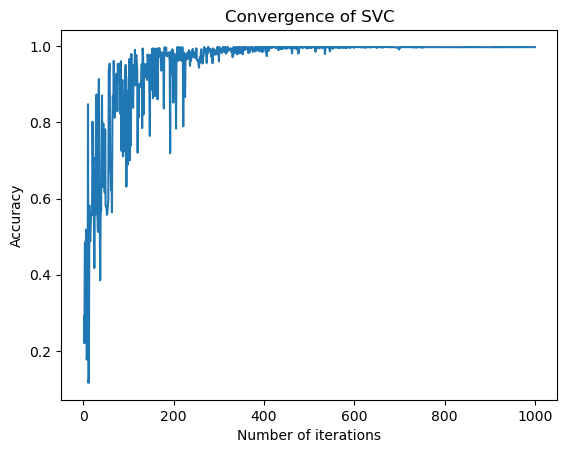

In [17]:
plt.plot(iterations, acc_list)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Convergence of SVC')
plt.show()